# Project - Cat vs Non-cat Classifier

**About the Project**

In this project, I'll build a cat vs non-cat classifier using a neural network. I am given a set of images of cats and other animals. I have to build a neural network to classify the given image as cat or non-cat

**About the Dataset**

Dataset is in .h5 file. Import h5py to interact with a dataset that is stored in an H5 file. It contains

train_catvnoncat.h5 - a training set of images labeled as cat (y=1) or non-cat (y=0)

test_catvnoncat.h5 - a test set of images labeled as cat or non-cat

Each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
%matplotlib inline

In [2]:
train_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/train_catvnoncat.h5', "r")

test_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/test_catvnoncat.h5', "r")

print("File format of train_dataset:",train_dataset)
print("File format of test_dataset:",test_dataset)

File format of train_dataset: <HDF5 file "train_catvnoncat.h5" (mode r)>
File format of test_dataset: <HDF5 file "test_catvnoncat.h5" (mode r)>


The train_dataset and test_dataset are HDF5 file objects. They have the data stored in a hierarchical format. Let us access the data and store it in form of numpy array as follows:

In [93]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

In [94]:
# Normalize pixel values to be between 0 and 1
train_set_x_orig, test_set_x_orig = train_set_x_orig / 255.0, test_set_x_orig / 255.0

In [95]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [55]:
train_set_y_orig.shape

(209,)

In [63]:
# Reshape the train and test set labels
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
train_set_y.shape

(1, 209)

In [44]:
train_set_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [56]:
test_set_x_orig.shape

(50, 64, 64, 3)

In [57]:
train_set_y_orig

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
# Check all the classes
classes = np.array(test_dataset["list_classes"][:])

In [15]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

[1]
cat


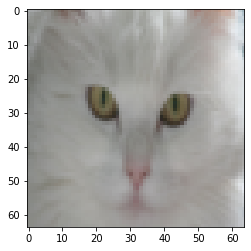

In [59]:
# Example of a picture

index = 50
plt.imshow(train_set_x_orig[index]) # You should see a cat image
y = train_set_y[:, index]
y_class = classes[np.squeeze(train_set_y[:, index])].decode("utf-8")
print(y)
print(y_class)

In [60]:
# Let us convert the coloured image into a grayscale image (image_grayscale), by replacing the values which are along the axis=2, by their mean value.
image_grayscale = train_set_x_orig[index].mean(axis=2).astype(np.float32)

In [61]:
image_grayscale.shape

(64, 64)

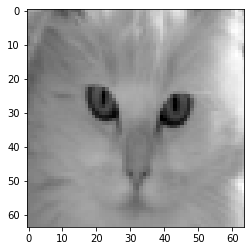

In [62]:
plt.imshow(image_grayscale, cmap="gray", interpolation="nearest")

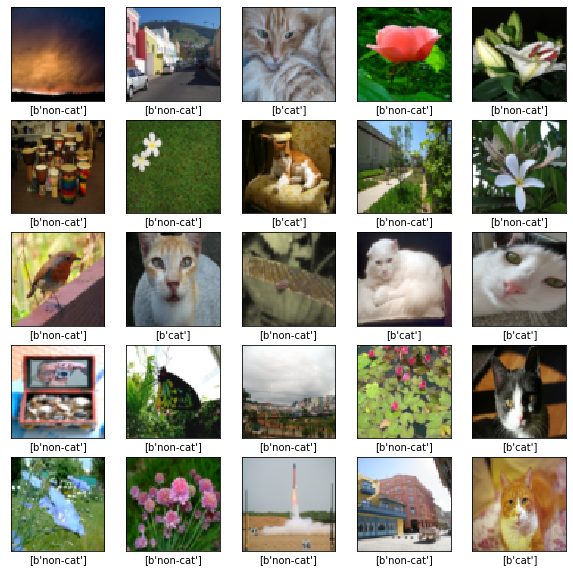

In [64]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set_x_orig[i])
    plt.xlabel(classes[train_set_y[:, i]])
plt.show()

In [65]:
train_images_gray= train_set_x_orig.mean(axis=3)
test_images_gray = test_set_x_orig.mean(axis=3)

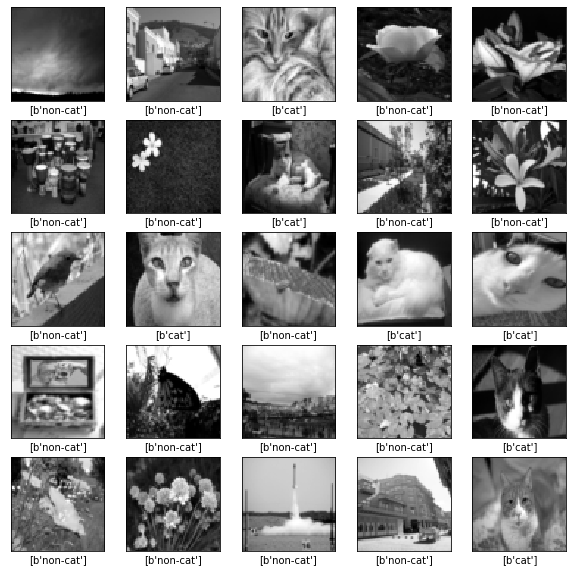

In [66]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_gray[i], cmap="gray", interpolation="nearest")
    plt.xlabel(classes[train_set_y[:, i]])
plt.show()

In [68]:
train_images = train_images_gray.reshape((209, 64, 64, 1))
test_images = test_images_gray.reshape((50, 64, 64, 1))

The test data contains 50 samples. Let the first 25 samples form the validation data, while the rest 25 samples form the test data.

In [71]:
validation_x = test_images[:25]
validation_y = test_set_y_orig[:25]
print("Validation data shape: ",validation_x.shape)

test_set_x =test_images[25:]
test_set_y = test_set_y_orig[25:]
print("Test data shape: ",test_set_x.shape)

Validation data shape:  (25, 64, 64, 1)
Test data shape:  (25, 64, 64, 1)


In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model

In [82]:
model2 = models.Sequential()
model2.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(2))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)               

In [78]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_delta=0.01)

In [83]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [76]:
train_set_y_orig

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
model2.fit(train_images, train_set_y_orig, epochs=100, batch_size=10, validation_data=(validation_x, validation_y))

Train on 209 samples, validate on 25 samples
Epoch 1/100
209/209 [==============================] - 1s 3ms/sample - loss: 0.6970 - acc: 0.5742 - val_loss: 0.8426 - val_acc: 0.2400
Epoch 2/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.6809 - acc: 0.6172 - val_loss: 0.7425 - val_acc: 0.2400
Epoch 3/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.6674 - acc: 0.6459 - val_loss: 0.7783 - val_acc: 0.2400
Epoch 4/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.6520 - acc: 0.6555 - val_loss: 0.8830 - val_acc: 0.2400
Epoch 5/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.6824 - acc: 0.6316 - val_loss: 0.7420 - val_acc: 0.2400
Epoch 6/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.6676 - acc: 0.6555 - val_loss: 0.7620 - val_acc: 0.2400
Epoch 7/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.6505 - acc: 0.6411 - val_loss: 0.8418 - val_acc: 0.2400
Epoch 8/10

Epoch 61/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.1853 - acc: 0.8995 - val_loss: 1.6741 - val_acc: 0.6400
Epoch 62/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.1620 - acc: 0.9378 - val_loss: 2.1413 - val_acc: 0.5200
Epoch 63/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.1407 - acc: 0.9330 - val_loss: 2.6079 - val_acc: 0.5600
Epoch 64/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.1298 - acc: 0.9330 - val_loss: 2.3252 - val_acc: 0.5200
Epoch 65/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.0750 - acc: 0.9617 - val_loss: 2.7407 - val_acc: 0.4800
Epoch 66/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.1497 - acc: 0.9378 - val_loss: 1.9337 - val_acc: 0.6800
Epoch 67/100
209/209 [==============================] - 0s 2ms/sample - loss: 0.0834 - acc: 0.9522 - val_loss: 2.5892 - val_acc: 0.5200
Epoch 68/100
209/209 [==========================

In [87]:
from tensorflow.keras.applications import VGG16   #VGG16 pretrained weights    
# from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, GlobalAveragePooling2D

In [88]:
vgg_base = VGG16(weights='imagenet', include_top=False)

for layer in vgg_base.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 3s 0us/step


In [96]:
validation_x = test_set_x_orig[:25]
validation_y = test_set_y_orig[:25]
print("Validation data shape: ",validation_x.shape)

test_set_x =test_set_x_orig[25:]
test_set_y = test_set_y_orig[25:]
print("Test data shape: ",test_set_x.shape)

Validation data shape:  (25, 64, 64, 3)
Test data shape:  (25, 64, 64, 3)


In [97]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [98]:
inp = Input(shape=(64, 64, 3), name='image_input')

# #initiate a model
vgg_model = models.Sequential() #Add the VGG base model
vgg_model.add(vgg_base)

vgg_model.add(tf.keras.layers.GlobalAveragePooling2D())
vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.6))
vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.4))
vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.3))
vgg_model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
vgg_model.compile(loss='binary_crossentropy', optimizer=optimizer,    metrics=['accuracy'])

W0623 21:59:44.124456 140648836622144 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


In [100]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_delta=0.01)

In [105]:
x1 = vgg_model.fit(train_set_x_orig, train_set_y_orig, epochs=15, validation_data=(validation_x, validation_y), verbose=1,
             callbacks=[early_stopping, reduce_lr])

Train on 209 samples, validate on 25 samples
Epoch 1/15
209/209 [==============================] - 3s 16ms/sample - loss: 0.0372 - acc: 0.9904 - val_loss: 0.1130 - val_acc: 0.9600
Epoch 2/15
209/209 [==============================] - 3s 16ms/sample - loss: 0.0171 - acc: 0.9904 - val_loss: 0.1011 - val_acc: 0.9600
Epoch 3/15
209/209 [==============================] - 3s 16ms/sample - loss: 0.0257 - acc: 0.9809 - val_loss: 0.0760 - val_acc: 0.9600
Epoch 4/15
209/209 [==============================] - 3s 16ms/sample - loss: 0.0102 - acc: 0.9952 - val_loss: 0.0694 - val_acc: 0.9600
Epoch 5/15
209/209 [==============================] - 4s 18ms/sample - loss: 0.0132 - acc: 0.9952 - val_loss: 0.0803 - val_acc: 0.9600
Epoch 6/15
209/209 [==============================] - 4s 20ms/sample - loss: 0.0149 - acc: 0.9952 - val_loss: 0.1066 - val_acc: 0.9600
Epoch 7/15
209/209 [==============================] - 4s 20ms/sample - loss: 0.0066 - acc: 1.0000 - val_loss: 0.1085 - val_acc: 0.9600
Epoch 8/15

In [108]:
vgg_model_loss, vgg_model_acc = vgg_model.evaluate(test_set_x,test_set_y)
print('Test accuracy using VGG16 model as base:', vgg_model_acc)

25/25 [==============================] - 0s 15ms/sample - loss: 0.8358 - acc: 0.8800
Test accuracy using VGG16 model as base: 0.88


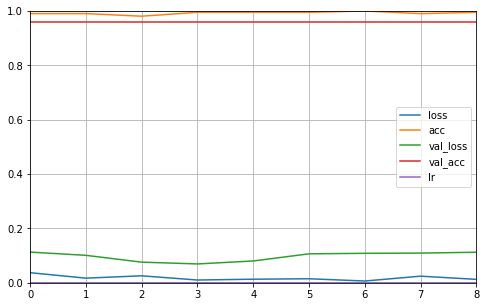

In [109]:
import pandas as pd

pd.DataFrame(x1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

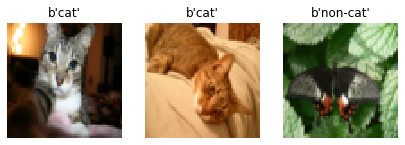

In [111]:

plt.figure(figsize=(7, 3))
for index, image in enumerate(test_set_x[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(classes[test_set_y[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()